Challenge 1

In [16]:
#Import neccesary libraries
import pandas as pd
import numpy as np
from datetime import datetime

In [1]:
list_i = []
for i in range(10):
    list_i.append(i)
print(len(list_i))
    

10


In [2]:
#Read the houston housing dataset for EDA
houston_dataset = pd.read_csv(r"C:\Users\Semiu\Desktop\houstonhousing.csv", low_memory = False)

In [3]:
houston_dataset.head()

,NPPRJID,Sr_Request_Num,RecordCreateDate,HCAD,Merged_Situs,Space,Zip,CouncilDistrict,Subdivision,LegalDescription,Legal 2,Received_Method,Project_Status,Comment311upd,Violation_Category,ViolationSubId,Ordno,ShortDescription,DeadLineDate,CheckBackDate
0,340418,101002029917,2016-04-29 00:00:00,0422260050040,2821 LUELL ST,NaN,77093,H,ABST 329 J T HARRELL,TRS 8 & 18C (001*TRS 62 & 68B),NaN,SR(311),CLOSED,VIOLATION CONFIRM NOTICE SENT\r\n\r\nCB ON 6/2...,Junked Motor Vehicle,647451.0,10-532,Junk Motor Vehicle,2016-06-03 00:00:00,2016-07-08 00:00:00
1,340418,101002029917,2016-04-29 00:00:00,0422260050040,2821 LUELL ST,NaN,77093,H,ABST 329 J T HARRELL,TRS 8 & 18C (001*TRS 62 & 68B),NaN,SR(311),CLOSED,VIOLATION CONFIRM NOTICE SENT\r\n\r\nCB ON 6/2...,Junked Motor Vehicle,647452.0,10-361(d),"No person who owns, controls, or occupies real...",2016-05-14 00:00:00,2016-07-08 00:00:00
2,340419,NaN,2016-04-29 00:00:00,0862290000005,6711 PARKHURST DR,MAIN STRUCTURE,77028,B,SETTEGAST GARDENS SEC 3,LT 5 BLK 7,"Lot 5, in Block 7 of Settegast Gardens, Sectio...",Proactive,CLOSED,NaN,Dangerous Building,647453.0,10-371(a)(3),A building with a floor or a roof of insuffici...,2016-05-19 00:00:00,2016-05-19 00:00:00
3,340419,NaN,2016-04-29 00:00:00,0862290000005,6711 PARKHURST DR,MAIN STRUCTURE,77028,B,SETTEGAST GARDENS SEC 3,LT 5 BLK 7,"Lot 5, in Block 7 of Settegast Gardens, Sectio...",Proactive,CLOSED,NaN,Dangerous Building,647454.0,10-371(a)(4),A building with a part not properly attached s...,2016-05-19 00:00:00,2016-05-19 00:00:00
4,340419,NaN,2016-04-29 00:00:00,0862290000005,6711 PARKHURST DR,MAIN STRUCTURE,77028,B,SETTEGAST GARDENS SEC 3,LT 5 BLK 7,"Lot 5, in Block 7 of Settegast Gardens, Sectio...",Proactive,CLOSED,NaN,Dangerous Building,647455.0,10-371(a)(8),"A vacant building, regardless of its structura...",2016-05-14 00:00:00,2016-05-19 00:00:00


In [4]:
#Find the total mumber of rows in the dataset
len(houston_dataset)

376092

In [5]:
#Find the count of each value of the Council District column 
#This shows the value of D
houston_dataset['CouncilDistrict'].value_counts()

B            16127
D            12899
H            10120
I             7000
K             6431
A             5168
C             4452
E             2970
F             2613
J             2514
G              625
SETTEGAST        2
c                2
f                1
5                1
1                1
b                1
Name: CouncilDistrict, dtype: int64

In [6]:
#Create a summary table comparing the two columns 'Violation_Category','Project_Status'
houston_group = houston_dataset.groupby(['Violation_Category','Project_Status']).size().unstack(fill_value=0)
print(houston_group)

Project_Status                  CLOSED   OPEN
Violation_Category                           
DON - 1 - Nuisance              152902  16857
DON - 2 - Dangerous Building     30348  10887
DON - 3 - Junked Motor Vehicle   46656   6629
DON - 4 - Minimum Standards      21390   3448
DON - 5 - Heavy Trash            15704    312
Dangerous Building                7240     63
Heavy Trash                       7001      0
Junked Motor Vehicle              8080      4
Minimum Standards                10107      7
Nuisance                         38442     15


In [7]:
#Create a summary table comparing the two columns 'Violation_Category','Council District'
houston_district_violation = houston_dataset.groupby(['CouncilDistrict', 'Violation_Category']).size().unstack(fill_value=0)
print(houston_district_violation)

Violation_Category  Nuisance  Dangerous Building  Heavy Trash  \
CouncilDistrict                                                 
1                          1                   0            0   
5                          1                   0            0   
A                       2389                 277          832   
B                       9649                2336          542   
C                       2674                 480          231   
D                       7919                1539          718   
E                       1128                 225          459   
F                       1161                  80          709   
G                        314                  88            7   
H                       6131                 965          804   
I                       3567                 709          601   
J                       1055                 182          641   
K                       2445                 421         1449   
SETTEGAST                

In [13]:
#Remove Violation/District council pair less than 50
vio_category = ['Nuisance','Dangerous Building','Heavy Trash','Junked Motor Vehicle','Minimum Standards']

for vio_cat in vio_category:
    houston_district_violation_refined = houston_district_violation.loc[houston_district_violation[vio_cat] > 50]

In [ ]:
houston_district_violation_refined = houston_district_violation.loc[houston_district_violation['Heavy Trash'] > 50]

In [17]:
houston_district_violation_refined

Violation_Category,Nuisance,Dangerous Building,Heavy Trash,Junked Motor Vehicle,Minimum Standards
CouncilDistrict,,,,,
A,2389,277,832,872,798
B,9649,2336,542,1444,2156
C,2674,480,231,426,641
D,7919,1539,718,1240,1483
E,1128,225,459,616,542
F,1161,80,709,296,367
H,6131,965,804,708,1512
I,3567,709,601,854,1269
J,1055,182,641,358,278


In [18]:
houston_district_violation_refined.shape


(10, 5)

In [20]:
houston_district_violation_refined_reset = houston_district_violation_refined.reset_index()

In [21]:
houston_district_violation_refined_reset

Violation_Category,CouncilDistrict,Nuisance,Dangerous Building,Heavy Trash,Junked Motor Vehicle,Minimum Standards
0,A,2389,277,832,872,798
1,B,9649,2336,542,1444,2156
2,C,2674,480,231,426,641
3,D,7919,1539,718,1240,1483
4,E,1128,225,459,616,542
5,F,1161,80,709,296,367
6,H,6131,965,804,708,1512
7,I,3567,709,601,854,1269
8,J,1055,182,641,358,278
9,K,2445,421,1449,1212,904


In [30]:
pd.crosstab(houston_district_violation_refined_reset.Nuisance, houston_district_violation_refined_reset.CouncilDistrict, normalize='columns')

CouncilDistrict,A,B,C,D,E,F,H,I,J,K
Nuisance,,,,,,,,,,
1055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1128,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1161,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2389,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2674,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6131,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7919,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
houston_district_violation_refined_reset_dict

[{'CouncilDistrict': 'A',
  'Nuisance': 2389,
  'Dangerous Building': 277,
  'Heavy Trash': 832,
  'Junked Motor Vehicle': 872,
  'Minimum Standards': 798},
 {'CouncilDistrict': 'B',
  'Nuisance': 9649,
  'Dangerous Building': 2336,
  'Heavy Trash': 542,
  'Junked Motor Vehicle': 1444,
  'Minimum Standards': 2156},
 {'CouncilDistrict': 'C',
  'Nuisance': 2674,
  'Dangerous Building': 480,
  'Heavy Trash': 231,
  'Junked Motor Vehicle': 426,
  'Minimum Standards': 641},
 {'CouncilDistrict': 'D',
  'Nuisance': 7919,
  'Dangerous Building': 1539,
  'Heavy Trash': 718,
  'Junked Motor Vehicle': 1240,
  'Minimum Standards': 1483},
 {'CouncilDistrict': 'E',
  'Nuisance': 1128,
  'Dangerous Building': 225,
  'Heavy Trash': 459,
  'Junked Motor Vehicle': 616,
  'Minimum Standards': 542},
 {'CouncilDistrict': 'F',
  'Nuisance': 1161,
  'Dangerous Building': 80,
  'Heavy Trash': 709,
  'Junked Motor Vehicle': 296,
  'Minimum Standards': 367},
 {'CouncilDistrict': 'H',
  'Nuisance': 6131,
  'Dang

In [ ]:
houston_district_violation_refined_reset

In [ ]:
houston_district_violation_refined_reset.groupby('B')['A'].value_counts()/df.groupby('B')['A'].count()

In [ ]:
#
cond_prob_list = []
for vio_cat in vio_category:
    cond_prob = houston_district_violation_refined[vio_cat].apply(lambda x: x/len(x))
    cond_prob_list.append(cond_prob_list)


median(cond_prob_list)

In [7]:
#Convert the group above to a dictionary data structure
houston_group_dict = houston_group.to_dict('records')

In [8]:
#Calculate the faction of 'OPEN' for each item in the dictionary
fractions_open = []
for items in houston_group_dict:
    fraction = items['OPEN']/(items['CLOSED']+items['CLOSED'])
    fractions_open.append(fraction)

In [9]:
#Show the list of the fraction for the 'OPEN'
fractions_open 

[0.05512354318452342,
 0.17936931593515223,
 0.07104123799725652,
 0.08059841047218326,
 0.009933774834437087,
 0.004350828729281768,
 0.0,
 0.00024752475247524753,
 0.0003462946472741664,
 0.00019509911034805682]

In [10]:
#The highest fraction value in the list
max(fractions_open)

0.17936931593515223

In [11]:
#This shows the number of mentions of "kitchen" in the Short description per Violation category
houston_dataset.groupby("Violation_Category", sort=False)["ShortDescription"].apply(lambda ser: ser.str.contains("kitchen").sum()).nlargest(20)

Violation_Category
DON - 4 - Minimum Standards       74
Minimum Standards                 34
Junked Motor Vehicle               0
Dangerous Building                 0
Nuisance                           0
Heavy Trash                        0
DON - 1 - Nuisance                 0
DON - 3 - Junked Motor Vehicle     0
DON - 2 - Dangerous Building       0
DON - 5 - Heavy Trash              0
Name: ShortDescription, dtype: int64

In [12]:
#This shows the number of mentions of "bathroom" in the Short description per Violation category
houston_dataset.groupby("Violation_Category", sort=False)["ShortDescription"].apply(lambda ser: ser.str.contains("bathroom").sum()).nlargest(10)

Violation_Category
DON - 4 - Minimum Standards       115
Minimum Standards                  41
Junked Motor Vehicle                0
Dangerous Building                  0
Nuisance                            0
Heavy Trash                         0
DON - 1 - Nuisance                  0
DON - 3 - Junked Motor Vehicle      0
DON - 2 - Dangerous Building        0
DON - 5 - Heavy Trash               0
Name: ShortDescription, dtype: int64

In [13]:
#This shows the number of mentions of "toilet" in the Short description per Violation category
houston_dataset.groupby("Violation_Category", sort=False)["ShortDescription"].apply(lambda ser: ser.str.contains("toilet").sum()).nlargest(10)

Violation_Category
DON - 4 - Minimum Standards       194
Minimum Standards                  66
Junked Motor Vehicle                0
Dangerous Building                  0
Nuisance                            0
Heavy Trash                         0
DON - 1 - Nuisance                  0
DON - 3 - Junked Motor Vehicle      0
DON - 2 - Dangerous Building        0
DON - 5 - Heavy Trash               0
Name: ShortDescription, dtype: int64

Checking the above, two short descriptions (DON - 4 - Minimum Standards and Minimum Standards) mention "kitchen","bathroom", or "toilet." 

In [14]:
#Calculate the frequency for each Zip and fix it in a new column called 'Freq'
houston_dataset['freq'] = houston_dataset.groupby(by='Zip')['Zip'].transform('count') 

In [15]:
#Show the first 5 rows of the new data frame with the freq column
houston_dataset.head()

,NPPRJID,Sr_Request_Num,RecordCreateDate,HCAD,Merged_Situs,Space,Zip,CouncilDistrict,Subdivision,LegalDescription,...,Received_Method,Project_Status,Comment311upd,Violation_Category,ViolationSubId,Ordno,ShortDescription,DeadLineDate,CheckBackDate,freq
0,340418,101002029917,2016-04-29 00:00:00,0422260050040,2821 LUELL ST,NaN,77093,H,ABST 329 J T HARRELL,TRS 8 & 18C (001*TRS 62 & 68B),...,SR(311),CLOSED,VIOLATION CONFIRM NOTICE SENT\r\n\r\nCB ON 6/2...,Junked Motor Vehicle,647451.0,10-532,Junk Motor Vehicle,2016-06-03 00:00:00,2016-07-08 00:00:00,6174.0
1,340418,101002029917,2016-04-29 00:00:00,0422260050040,2821 LUELL ST,NaN,77093,H,ABST 329 J T HARRELL,TRS 8 & 18C (001*TRS 62 & 68B),...,SR(311),CLOSED,VIOLATION CONFIRM NOTICE SENT\r\n\r\nCB ON 6/2...,Junked Motor Vehicle,647452.0,10-361(d),"No person who owns, controls, or occupies real...",2016-05-14 00:00:00,2016-07-08 00:00:00,6174.0
2,340419,NaN,2016-04-29 00:00:00,0862290000005,6711 PARKHURST DR,MAIN STRUCTURE,77028,B,SETTEGAST GARDENS SEC 3,LT 5 BLK 7,...,Proactive,CLOSED,NaN,Dangerous Building,647453.0,10-371(a)(3),A building with a floor or a roof of insuffici...,2016-05-19 00:00:00,2016-05-19 00:00:00,12764.0
3,340419,NaN,2016-04-29 00:00:00,0862290000005,6711 PARKHURST DR,MAIN STRUCTURE,77028,B,SETTEGAST GARDENS SEC 3,LT 5 BLK 7,...,Proactive,CLOSED,NaN,Dangerous Building,647454.0,10-371(a)(4),A building with a part not properly attached s...,2016-05-19 00:00:00,2016-05-19 00:00:00,12764.0
4,340419,NaN,2016-04-29 00:00:00,0862290000005,6711 PARKHURST DR,MAIN STRUCTURE,77028,B,SETTEGAST GARDENS SEC 3,LT 5 BLK 7,...,Proactive,CLOSED,NaN,Dangerous Building,647455.0,10-371(a)(8),"A vacant building, regardless of its structura...",2016-05-14 00:00:00,2016-05-19 00:00:00,12764.0


In [16]:
#Create a new dataframe for only the Zip and frequency
zip_freq_data = pd.concat([houston_dataset['Zip'], houston_dataset['freq']], axis=1)

In [17]:
#Treating duplicate data, get a list of only the unique values for Zip
list_unique_zip = zip_freq_data['Zip'].unique()

In [18]:
#Treating duplicate data, get a list of only the unique values for Freq
list_unique_freq = zip_freq_data['freq'].unique()

In [19]:
#Create a new dataframe for the unique Zip and their corresponding freq, signifying the number of violation per zip code
unique_zip_freq_data = pd.DataFrame(list(zip(list_unique_zip,list_unique_freq)),columns=["Zip","Freq"])

In [20]:
unique_zip_freq_data.head()

,Zip,Freq
0,77093,6174.0
1,77028,12764.0
2,77045,10357.0
3,77074,6653.0
4,77088,12900.0


In [21]:
len(unique_zip_freq_data)

112

In [22]:
#Read the population for each ZIP code
houston_zip_data = pd.read_csv(r"C:\Users\Semiu\Desktop\houston_by_ZIP_code.csv", low_memory = False)

In [23]:
#Looking at what the data looks like
houston_zip_data.head()

,Zip Code,Location,City,Population,National Rank
0,77046,"29.733084, -95.430659","Houston, Texas",471,#108
1,77081,"29.712099, -95.480935","Houston, Texas",49691,#308
2,77036,"29.699048, -95.536507","Houston, Texas",76146,#609
3,77006,"29.741003, -95.391271","Houston, Texas",18875,#754
4,77057,"29.744068, -95.489210","Houston, Texas",35491,#825


In [25]:
#Filter out zip codes with less than 20000 population
morethan_20000_houston_zip_data = houston_zip_data[houston_zip_data['Population'] > 20000]

In [26]:
morethan_20000_houston_zip_data.head()

,Zip Code,Location,City,Population,National Rank
1,77081,"29.712099, -95.480935","Houston, Texas",49691,#308
2,77036,"29.699048, -95.536507","Houston, Texas",76146,#609
4,77057,"29.744068, -95.489210","Houston, Texas",35491,#825
5,77074,"29.687947, -95.515725","Houston, Texas",39159,#918
6,77080,"29.815893, -95.522964","Houston, Texas",46261,#959


In [49]:
#Get the Latitude and fix it into the Dataframe
morethan_20000_houston_zip_data['Lon'] = morethan_20000_houston_zip_data['Location'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.strip()).astype(float)

C:\Users\Semiu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
#get the Longititude and fix it into the dataframe
morethan_20000_houston_zip_data['Lat'] = morethan_20000_houston_zip_data['Location'].apply(lambda x: x.split(',')[0]).astype(float)

C:\Users\Semiu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
#Checking the data after adding the Lat and Lon
morethan_20000_houston_zip_data.head()

,Zip Code,Location,City,Population,National Rank,Lat,Lon
1,77081,"29.712099, -95.480935","Houston, Texas",49691,#308,29.712099,-95.480935
2,77036,"29.699048, -95.536507","Houston, Texas",76146,#609,29.699048,-95.536507
4,77057,"29.744068, -95.489210","Houston, Texas",35491,#825,29.744068,-95.489210
5,77074,"29.687947, -95.515725","Houston, Texas",39159,#918,29.687947,-95.515725
6,77080,"29.815893, -95.522964","Houston, Texas",46261,#959,29.815893,-95.522964


In [65]:
#Get all the latitudes into a list
lats = []
for lat in morethan_20000_houston_zip_data['Lat']:
    lats.append(lat)

In [66]:
#get all the longititudes into a list
lons = []
for lon in morethan_20000_houston_zip_data['Lon']:
    lons.append(lon)

In [71]:
#Calcluate the perimeter of the place which is the average of the distances
from pyproj import Geod

geod = Geod('+a=6378137 +f=0.0033528106647475126')

poly_area, poly_perimeter = geod.polygon_area_perimeter(lons, lats)

print("area: {} , perimeter: {}".format(poly_area, poly_perimeter))

area: -945462941.2232239 , perimeter: 1261861.3636083556


In [72]:
#Convert poly perimeter to miles
poly_perimeter_miles = 1/1.60934 * poly_perimeter

#Radius of the space
radius_est = 45 * 3.17/128 * poly_perimeter_miles

#Circle square mile (which is Houston square mile)
houston_size = 3.17 * radius_est * radius_est
print(houston_size)

2420530445238.3755


In [ ]:
######Date

In [4]:
houston_dataset.head()

,NPPRJID,Sr_Request_Num,RecordCreateDate,HCAD,Merged_Situs,Space,Zip,CouncilDistrict,Subdivision,LegalDescription,Legal 2,Received_Method,Project_Status,Comment311upd,Violation_Category,ViolationSubId,Ordno,ShortDescription,DeadLineDate,CheckBackDate
0,340418,101002029917,2016-04-29 00:00:00,0422260050040,2821 LUELL ST,NaN,77093,H,ABST 329 J T HARRELL,TRS 8 & 18C (001*TRS 62 & 68B),NaN,SR(311),CLOSED,VIOLATION CONFIRM NOTICE SENT\r\n\r\nCB ON 6/2...,Junked Motor Vehicle,647451.0,10-532,Junk Motor Vehicle,2016-06-03 00:00:00,2016-07-08 00:00:00
1,340418,101002029917,2016-04-29 00:00:00,0422260050040,2821 LUELL ST,NaN,77093,H,ABST 329 J T HARRELL,TRS 8 & 18C (001*TRS 62 & 68B),NaN,SR(311),CLOSED,VIOLATION CONFIRM NOTICE SENT\r\n\r\nCB ON 6/2...,Junked Motor Vehicle,647452.0,10-361(d),"No person who owns, controls, or occupies real...",2016-05-14 00:00:00,2016-07-08 00:00:00
2,340419,NaN,2016-04-29 00:00:00,0862290000005,6711 PARKHURST DR,MAIN STRUCTURE,77028,B,SETTEGAST GARDENS SEC 3,LT 5 BLK 7,"Lot 5, in Block 7 of Settegast Gardens, Sectio...",Proactive,CLOSED,NaN,Dangerous Building,647453.0,10-371(a)(3),A building with a floor or a roof of insuffici...,2016-05-19 00:00:00,2016-05-19 00:00:00
3,340419,NaN,2016-04-29 00:00:00,0862290000005,6711 PARKHURST DR,MAIN STRUCTURE,77028,B,SETTEGAST GARDENS SEC 3,LT 5 BLK 7,"Lot 5, in Block 7 of Settegast Gardens, Sectio...",Proactive,CLOSED,NaN,Dangerous Building,647454.0,10-371(a)(4),A building with a part not properly attached s...,2016-05-19 00:00:00,2016-05-19 00:00:00
4,340419,NaN,2016-04-29 00:00:00,0862290000005,6711 PARKHURST DR,MAIN STRUCTURE,77028,B,SETTEGAST GARDENS SEC 3,LT 5 BLK 7,"Lot 5, in Block 7 of Settegast Gardens, Sectio...",Proactive,CLOSED,NaN,Dangerous Building,647455.0,10-371(a)(8),"A vacant building, regardless of its structura...",2016-05-14 00:00:00,2016-05-19 00:00:00


In [11]:
#Convert the houston dataset to dictionary
houston_dataset_dict = houston_dataset.to_dict('records')

In [20]:
date_format_str = "%Y-%m-%d %H:%M:%S"

In [18]:
#Function to generate difference in days for each dead line and checkback dates
def generate_diff_indays(a,b):
    f_dead_line = datetime.strptime(a, date_format_str)
    f_check_back = datetime.strptime(b, date_format_str)
    diff = f_check_back.date() - f_dead_line.date()
    return diff.days

In [21]:
#Generate the difference in days for each record
list_days_diff = []
for record in houston_dataset_dict:
    if pd.isna(record['DeadLineDate']) or pd.isna(record['CheckBackDate']):
        list_days_diff.append('NA')
    else:
        diff = generate_diff_indays(str(record['DeadLineDate']), str(record['CheckBackDate']))
        list_days_diff.append(diff)

In [22]:
#Convert the date difference in days to data frame 
days_diff = pd.DataFrame(list_days_diff, columns = ['DiffInDays'])

In [23]:
#Create a new dataframe where difference in the check and dead line dates is added
houston_dataset_days_mth = pd.concat([houston_dataset, days_diff], axis=1)

In [24]:
houston_dataset_days_mth.head()

,NPPRJID,Sr_Request_Num,RecordCreateDate,HCAD,Merged_Situs,Space,Zip,CouncilDistrict,Subdivision,LegalDescription,...,Received_Method,Project_Status,Comment311upd,Violation_Category,ViolationSubId,Ordno,ShortDescription,DeadLineDate,CheckBackDate,DiffInDays
0,340418,101002029917,2016-04-29 00:00:00,0422260050040,2821 LUELL ST,NaN,77093,H,ABST 329 J T HARRELL,TRS 8 & 18C (001*TRS 62 & 68B),...,SR(311),CLOSED,VIOLATION CONFIRM NOTICE SENT\r\n\r\nCB ON 6/2...,Junked Motor Vehicle,647451.0,10-532,Junk Motor Vehicle,2016-06-03 00:00:00,2016-07-08 00:00:00,35
1,340418,101002029917,2016-04-29 00:00:00,0422260050040,2821 LUELL ST,NaN,77093,H,ABST 329 J T HARRELL,TRS 8 & 18C (001*TRS 62 & 68B),...,SR(311),CLOSED,VIOLATION CONFIRM NOTICE SENT\r\n\r\nCB ON 6/2...,Junked Motor Vehicle,647452.0,10-361(d),"No person who owns, controls, or occupies real...",2016-05-14 00:00:00,2016-07-08 00:00:00,55
2,340419,NaN,2016-04-29 00:00:00,0862290000005,6711 PARKHURST DR,MAIN STRUCTURE,77028,B,SETTEGAST GARDENS SEC 3,LT 5 BLK 7,...,Proactive,CLOSED,NaN,Dangerous Building,647453.0,10-371(a)(3),A building with a floor or a roof of insuffici...,2016-05-19 00:00:00,2016-05-19 00:00:00,0
3,340419,NaN,2016-04-29 00:00:00,0862290000005,6711 PARKHURST DR,MAIN STRUCTURE,77028,B,SETTEGAST GARDENS SEC 3,LT 5 BLK 7,...,Proactive,CLOSED,NaN,Dangerous Building,647454.0,10-371(a)(4),A building with a part not properly attached s...,2016-05-19 00:00:00,2016-05-19 00:00:00,0
4,340419,NaN,2016-04-29 00:00:00,0862290000005,6711 PARKHURST DR,MAIN STRUCTURE,77028,B,SETTEGAST GARDENS SEC 3,LT 5 BLK 7,...,Proactive,CLOSED,NaN,Dangerous Building,647455.0,10-371(a)(8),"A vacant building, regardless of its structura...",2016-05-14 00:00:00,2016-05-19 00:00:00,5


In [25]:
#Remove DiffInDays rows with 'NA' values before time series analysis
houston_dataset_days_mth_refined = houston_dataset_days_mth.loc[houston_dataset_days_mth["DiffInDays"]!= 'NA']

In [26]:
houston_dataset_days_mth_refined.head()

,NPPRJID,Sr_Request_Num,RecordCreateDate,HCAD,Merged_Situs,Space,Zip,CouncilDistrict,Subdivision,LegalDescription,...,Received_Method,Project_Status,Comment311upd,Violation_Category,ViolationSubId,Ordno,ShortDescription,DeadLineDate,CheckBackDate,DiffInDays
0,340418,101002029917,2016-04-29 00:00:00,0422260050040,2821 LUELL ST,NaN,77093,H,ABST 329 J T HARRELL,TRS 8 & 18C (001*TRS 62 & 68B),...,SR(311),CLOSED,VIOLATION CONFIRM NOTICE SENT\r\n\r\nCB ON 6/2...,Junked Motor Vehicle,647451.0,10-532,Junk Motor Vehicle,2016-06-03 00:00:00,2016-07-08 00:00:00,35
1,340418,101002029917,2016-04-29 00:00:00,0422260050040,2821 LUELL ST,NaN,77093,H,ABST 329 J T HARRELL,TRS 8 & 18C (001*TRS 62 & 68B),...,SR(311),CLOSED,VIOLATION CONFIRM NOTICE SENT\r\n\r\nCB ON 6/2...,Junked Motor Vehicle,647452.0,10-361(d),"No person who owns, controls, or occupies real...",2016-05-14 00:00:00,2016-07-08 00:00:00,55
2,340419,NaN,2016-04-29 00:00:00,0862290000005,6711 PARKHURST DR,MAIN STRUCTURE,77028,B,SETTEGAST GARDENS SEC 3,LT 5 BLK 7,...,Proactive,CLOSED,NaN,Dangerous Building,647453.0,10-371(a)(3),A building with a floor or a roof of insuffici...,2016-05-19 00:00:00,2016-05-19 00:00:00,0
3,340419,NaN,2016-04-29 00:00:00,0862290000005,6711 PARKHURST DR,MAIN STRUCTURE,77028,B,SETTEGAST GARDENS SEC 3,LT 5 BLK 7,...,Proactive,CLOSED,NaN,Dangerous Building,647454.0,10-371(a)(4),A building with a part not properly attached s...,2016-05-19 00:00:00,2016-05-19 00:00:00,0
4,340419,NaN,2016-04-29 00:00:00,0862290000005,6711 PARKHURST DR,MAIN STRUCTURE,77028,B,SETTEGAST GARDENS SEC 3,LT 5 BLK 7,...,Proactive,CLOSED,NaN,Dangerous Building,647455.0,10-371(a)(8),"A vacant building, regardless of its structura...",2016-05-14 00:00:00,2016-05-19 00:00:00,5


In [32]:
#Convert the record create date to date time from string
houston_dataset_days_mth_refined['RecordCreateDate']= pd.to_datetime(houston_dataset_days_mth_refined['RecordCreateDate'])
#Group the DiffInDays by the record create date
houston_dataset_days_mth_refined_grouped = houston_dataset_days_mth_refined.groupby([houston_dataset_days_mth_refined['RecordCreateDate'].dt.year, houston_dataset_days_mth_refined['RecordCreateDate'].dt.month]).agg({'DiffInDays':sum})

C:\Users\Semiu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
houston_dataset_days_mth_refined_grouped

DiffInDays
RecordCreateDate RecordCreateDate            
2014             1                     105992
                 2                     114324
                 3                     126866
                 4                     141462
                 5                     105109
                 6                     118341
                 7                     115440
                 8                      87438
                 9                      96808
                 10                     92161
                 11                     38875
                 12                     63161
2015             1                      38267
                 2                      61232
                 3                      41373
                 4                      64529
                 5                      54294
                 6                      37717
                 7                      36444
                 8                      44493
                 9                      40202
                 10                     37873
                 11                     23319
                 12                     49890
2016             1                      16245
                 2                         18
                 3                       4713
                 4                       1935
                 5                       1986
                 6                        405
                 7                         87
                 8                        546
                 9                        284
                 10                       234
                 11                        14
                 12                        54
2017             1                        525
                 2                        213
                 3                        398
                 4                        170
                 5                       1496
                 6                        174
                 7                         66
                 8                         43
                 9                        134
                 10                       126
                 11                       180
                 12                       572
2018             1                         31
                 2                        189
                 3                         52
                 4                         55

In [33]:
#Crude way to get the list of the difference in days for year 2014 to 2016
diff_days_=[]
for diff_day_ in houston_dataset_days_mth_refined_grouped['DiffInDays']:
    if diff_day_ == 525:
        break
    else:
        diff_days_.append(diff_day_)

In [34]:
diff_days_

[105992,
 114324,
 126866,
 141462,
 105109,
 118341,
 115440,
 87438,
 96808,
 92161,
 38875,
 63161,
 38267,
 61232,
 41373,
 64529,
 54294,
 37717,
 36444,
 44493,
 40202,
 37873,
 23319,
 49890,
 16245,
 18,
 4713,
 1935,
 1986,
 405,
 87,
 546,
 284,
 234,
 14,
 54]

In [35]:
#Linear Equation to fit the relationship
x = np.arange(0,len(diff_days_))
y=np.array(diff_days_)
z = np.polyfit(x,y,1)
print("{0}x + {1}".format(*z))

-3937.168983268983x + 117848.54054054049


In [117]:
#Save this data, houston_dataset_days_mth_refined, for future use
houston_dataset_days_mth_refined.to_csv(r"C:\Users\Semiu\Desktop\houstonhousingdaterefined.csv", index=False)

In [121]:
#Library for visualization
import matplotlib.pyplot as plt

#Read the houston housing dataset for EDA
houston_dataset_dates_parsed = pd.read_csv(r"C:\Users\Semiu\Desktop\houstonhousingdaterefined.csv", parse_dates=True, index_col="CheckBackDate")

<BarContainer object of 36 artists>

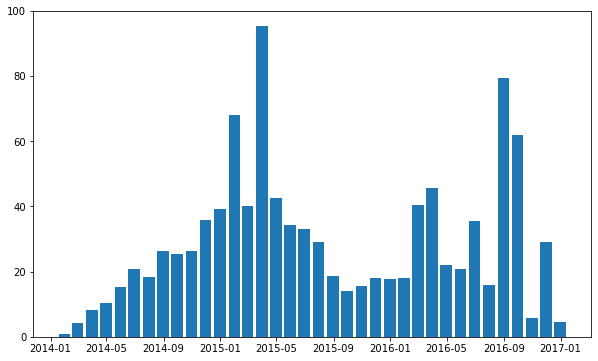

In [125]:
# Resampling the time series data based on monthly 'M' frequency
houston_dataset_dates_parsed_mth = houston_dataset_dates_parsed.resample("M").mean()

# using subplot
fig, ax = plt.subplots(figsize=(10, 6))

# plotting bar graph
ax.bar(houston_dataset_dates_parsed_mth['2014':'2016'].index, houston_dataset_dates_parsed_mth.loc['2014':'2016', "DiffInDays"], width=25, align='center')

<AxesSubplot:xlabel='CheckBackDate'>

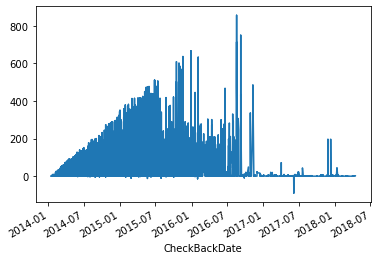

In [126]:
#
houston_dataset_dates_parsed["DiffInDays"].plot()

In [127]:
#Get the list of all the differece in days values
diff_days=[]
for diff_day in houston_dataset_days_mth_refined["DiffInDays"]:
    diff_days.append(diff_day)

In [129]:
#Linear Equation to fit the relationship
x = np.arange(0,len(diff_days))
y=np.array(diff_days)
z = np.polyfit(x,y,1)
print("{0}x + {1}".format(*z))

9.254902990173941e-05x + 24.644720122855023


In [12]:
#Zip code data

In [74]:
unique_zip_freq_data

,Zip,Freq
0,77093,6174.0
1,77028,12764.0
2,77045,10357.0
3,77074,6653.0
4,77088,12900.0
...,...,...
107,77058,52.0
108,77038,5.0
109,77086,16.0
110,77084,9.0


In [ ]:
def get_houston_data (morethan_20000_houston_zip_data, unique_zip_freq_data):
    zip_codes = []
    for zip_code_pop in morethan_20000_houston_zip_data['Zip Code']:
        zip_codes.append(zip_code_pop)
        for zip_code_unq in unique_zip_freq_data['Zip']:
            if zip_code_pop == zip_code_unq:
                

In [126]:
#Rename Zip code to Zip on the second dataframe for easy merge
morethan_20000_houston_zip_data = morethan_20000_houston_zip_data.rename(columns = {'Zip Code': 'Zip'})

In [143]:
morethan_20000_houston_zip_data['Zip'] = morethan_20000_houston_zip_data['Zip'].astype(int)

In [166]:
unique_zip_freq_data['Zip'] = unique_zip_freq_data['Zip'].astype("string")

In [168]:
unique_zip_freq_data['Zip'].fillna("", inplace=True)

In [174]:
unique_zip_freq_data['Zip'] = unique_zip_freq_data['Zip'].apply(lambda x: x.split('-')[0]).apply(lambda x: x.split('-')[0])

In [171]:
unique_zip_freq_data.head()

,Zip,Freq
0,77093,6174.0
1,77028,12764.0
2,77045,10357.0
3,77074,6653.0
4,77088,12900.0


In [192]:
#real = unique_zip_freq_data.merge(morethan_20000_houston_zip_data, on='Zip')

Challenge 2

In [ ]:
class Graph:
    def __init__(self, nodes, edges):
        #Num of nodes
        self.nodes = set(nodes)
        #Num of edges
        self.edges = set(frozenset((u,v)) for u,v in edges)
    
    def degEdge(self, edges):
        return sum(1 for e in self.edges if v in e)
        
    def expect_dist(self, start, step_size, num_steps):
        dist = 
        return dist 
        

In [ ]:
if __name__ == "__main__":
    node = (5,5)
    edge = 1*10 #step of size 1 in 10 steps
    
    dist = Graph(node, edge)

In [ ]:
Graph.expect_dict()

In [ ]:
{"start": [5,5]}